<a href="https://colab.research.google.com/github/NguyenMinhThangNMT/HomeWorks/blob/main/Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [94]:
folder = '/content/drive/MyDrive/ANH AI/Money/train/'

photos, labels = list(), list()
for file in listdir(folder) :
  
  if file.startswith('10'):
    output = 1.0
  if file.startswith('20'):
    output = 2.0
  if file.startswith('50'):
    output = 3.0
  if file.startswith('100'):
    output = 4.0

  photo = load_img(folder + file, target_size = (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_train = asarray(photos)
labels_train = asarray(labels)
print(photos_train.shape, labels_train.shape)
save('/content/drive/MyDrive/Mon AI/Money_photo.npy',photos_train)
save('/content/drive/MyDrive/Mon AI/Money_label.npy',labels_train)

(8, 30, 40, 3) (8,)


In [95]:
folder = '/content/drive/MyDrive/ANH AI/Money/test/'
photos, labels = list(), list()
for file in listdir(folder) :

  if file.startswith('10'):
    output = 1.0
  if file.startswith('20'):
    output = 2.0
  if file.startswith('50'):
    output = 3.0
  if file.startswith('100'):
    output = 4.0
  photo = load_img(folder + file, target_size = (30,40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos_test = asarray(photos)
labels_test = asarray(labels)
print(photos_test.shape, labels_test.shape)
save('/content/drive/MyDrive/Mon AI/Money_photo_test.npy',photos_test)
save('/content/drive/MyDrive/Mon AI/Money_photo_test.npy',labels_test)

(8, 30, 40, 3) (8,)


In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


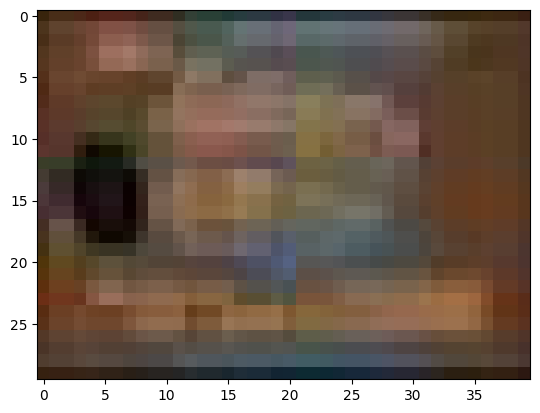

In [97]:
import matplotlib.pyplot as plt
import numpy as np
chosen_idx = 2
chosen_img = photos_train[chosen_idx]
plt.imshow((chosen_img*255).astype(np.uint8))
plt.show()

In [98]:
photos_train = photos_train.reshape(8,30, 40, 3)
photos_train = photos_train.astype('float32')/255 
photos_test = photos_test.reshape( 8,30, 40, 3)
photos_test = photos_test.astype('float32')/255

from keras.utils import  to_categorical
labels_train = to_categorical(labels_train)
labels_test = to_categorical(labels_test)
photos_train.shape, labels_train.shape, photos_test.shape, labels_test.shape

((8, 30, 40, 3), (8, 5), (8, 30, 40, 3), (8, 5))

In [99]:
from keras.models import Sequential, Model
from keras import Input, Model
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import BatchNormalization, LeakyReLU
batch_size = 64
epochs = 20
classes = 5

model = Sequential()
#CNN
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear',
                 input_shape = (30,40,3), padding = 'same')) 
# nhan tich chap 32 lan
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', padding ='same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))
#ANN
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation ='softmax'))

In [100]:
#compile
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])
model.summary()

train = model.fit(photos_train, labels_train, batch_size = batch_size , 
                  epochs = epochs, verbose = 1)

test_loss, test_acc = model.evaluate(photos_test, labels_test)
print('do chinh xac', test_acc)
print('ham mat mat', test_loss)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 40, 32)        896       
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 15, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 15, 20, 64)        18496     
                                                                 
 leaky_re_lu_29 (LeakyReLU)  (None, 15, 20, 64)        0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 10, 64)        0         
 g2D)                                                 

In [101]:
class_name = {1: '10k',2: '20k',3: '50k',
                  4: '100k',}

1/1 [==============================] - 0s 116ms/step
Predicted:  100k


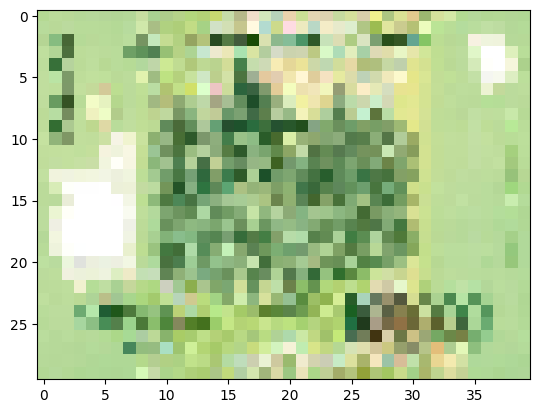

In [102]:

#test
filePath = '/content/drive/MyDrive/ANH AI/Money1/100k2.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(30,40))
arrayImage = img_to_array(testImage).reshape(1,30,40,3)/255
pred = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_name[pred])
plt.imshow(testImage)